In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from math import sqrt
%matplotlib inline
sns.set(style="darkgrid")

### 1. Классификация. Датасет тяжесть заболеваемости ковидом в зависимости от симптомов. Метрика качества RMSE (?)

In [34]:
data = pd.read_csv("4labDataCovidClassification.csv")

In [35]:
data.shape

(316800, 27)

### 2. Препроцессинг данных

In [36]:
data.columns

Index(['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
       'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
       'Gender_Transgender', 'Severity_Mild', 'Severity_Moderate',
       'Severity_None', 'Severity_Severe', 'Contact_Dont-Know', 'Contact_No',
       'Contact_Yes', 'Country'],
      dtype='object')

#### Severity_Mild (незначительная тяжесть), Severity_Moderate (средняя тяжесть), Severity_None (не болеет), Severity_Severe (тяжелая форма болезни)

### 2*. Посмотрим на корреляцию данных. Можно заметить возмущения в первых столбцах, некоторые симптомы ведут за собой другие.

In [37]:
# figure = plt.figure(figsize=(30,30))
# sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

### 3. Реализация метрики качества. \\ аргументировать выбор метрики качества 

### Разбиение на обучающую и тестовую выборки

In [38]:
indicators = ['Fever', 'Tiredness', 'Dry-Cough',  'Difficulty-in-Breathing', 'Sore-Throat', 
              'Pains', 'Nasal-Congestion', 'Runny-Nose', 'Diarrhea', 'Age_0-9', 'Age_10-19', 
              'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Male', 'Gender_Female', 
              'Gender_Transgender']

additional = ['Contact_Dont-Know', 'Contact_No', 'Contact_Yes']

target_columns = ['Severity_None']

X = data[indicators]
y = data[target_columns]

In [39]:
# from sklearn.preprocessing import StandardScaler
# X = StandardScaler().fit_transform(X)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y, test_size=0.3)

In [41]:
X_train.shape, X_test.shape, y_train.shape

((221760, 17), (95040, 17), (221760, 1))

### 4. Реализовать и обучить логистическую регрессию или линейную регрессию \\ !!!не разрешается использовать sklearn!!!

In [42]:
class LR:
    def __init__(self, step=10**-2, it_c=10, batch=6000):
        self.step = step
        self.it_c = it_c
        self.batch = batch

    def get_coeff(self, x, y):
        return self.err(x, y.to_numpy())
    
    def err(self, x, y):
        err = sum(list(map(lambda i : 1 if self.predict(x[i]) == y[i] else 0, range(len(y)))))
        return err / len(y)
    
    def fit(self, x, y):
        y = y.to_numpy()
        y = np.array([y[i][0] for i in range(len(y))])
        np.c_[x, np.ones(len(x))]
        self.w = np.zeros(x.shape[1])
        h = []
        for i in range(self.it_c):
            for b in range(0, len(x), self.batch):
                xx = x[b:min(b+self.batch,len(x))]
                yy = y[b:min(b+self.batch,len(x))]
                z = [sum([xx[i][j]*self.w[j] for j in range(len(xx[i]))]) for i in range(len(xx))]
                res = np.array([1 / (1 + np.exp(-a)) for a in z])
                grad = np.dot(xx.T, res - yy) / yy.size
                self.w -= self.step * grad
            h.append(self.err(x, y))
        return h
            
    def predict(self, x):
        np.append(x,1)
        return (1 / (1 + np.exp(-np.dot(x, self.w)))).round()

In [43]:
mlg = LR()
hist = mlg.fit(X_train, y_train)
print(f"моя LogReg: {mlg.get_coeff(X_test, y_test)}")

моя LogReg: 0.7506628787878787


### 4*. Добавить регуляризацию \\ не разрешается использовать sklearn

### 5. Оценить качество модели на обучающей и тестовой выборках \\ не разрешается использовать sklearn

### 5*. Сделать график ошибки модели на обучающей и тестовой выборках 
### 5*. Сделать график точности модели на обучающей и тестовой выборках

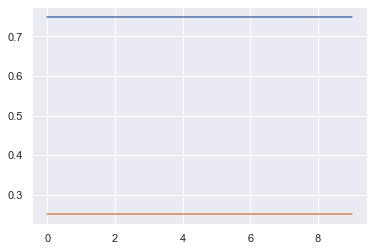

In [44]:
plt.plot(hist)
plt.plot(1 - np.array(hist))
plt.show()

### 6. Обучить логистическую регрессию или линейную регрессию из sklearn, оценить качество модели на обучающей и тестовой выборках и сравнить со своей моделью

In [45]:
from sklearn.linear_model import LogisticRegression
sklg = LogisticRegression()
sklg.fit(X_train, y_train.values.ravel())
print(f"sklearn: {sklg.score(X_test, y_test.values.ravel())}")

sklearn: 0.7506628787878787


In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train.values.ravel())
rfc.score(X_test, y_test.values.ravel())

0.7506628787878787

### 6*. Сделать график ошибки модели из sklearn на обучающей и тестовой выборках и сравнить со своей моделью
### 6*. Сделать график точности модели из sklearn на обучающей и тестовой выборках и сравнить со своей моделью

In [47]:
from sklearn.model_selection import learning_curve

In [48]:
train_sizes, train_scores, valid_scores = learning_curve(
    LogisticRegression(), X_train, y_train.values.ravel(), cv=10)

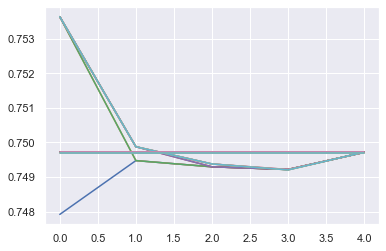

In [49]:
plt.plot(train_scores)
plt.plot(valid_scores)
plt.show()